In [106]:
# write a function that calculate the principal components of a dataset
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [107]:
def pca(X):
    # standardize the data
    X_std = StandardScaler().fit_transform(X)
    # calculate the covariance matrix
    cov_mat = np.cov(X_std.T)
    # calculate the eigenvalues and eigenvectors
    eig_vals, eig_vecs = np.linalg.eig(cov_mat)
    # sort the eigenvalues in descending order
    eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
    eig_pairs.sort(reverse=True)
    # calculate the explained variance
    tot = sum(eig_vals)
    var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
    # calculate the cumulative explained variance
    cum_var_exp = np.cumsum(var_exp)
    # plot the explained variance
    plt.figure(figsize=(5, 5))
    plt.bar(range(len(var_exp)), var_exp, alpha=0.3333, align='center', label='individual explained variance', color = 'g')
    plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid', label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.show()
    # calculate the projection matrix
    matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1)))
    # project the data
    Y = X_std.dot(matrix_w)
    # plot the data
    plt.figure(figsize=(10, 5))
    plt.scatter(Y[:,0], Y[:,1], color='g')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()
    return Y

In [108]:
X_train = np.array([[ -1., -1.],
                    [ 2.,  6.],
                    [ 4.,  5.],
                    [ 9.,  7.]])
X_train

array([[-1., -1.],
       [ 2.,  6.],
       [ 4.,  5.],
       [ 9.,  7.]])

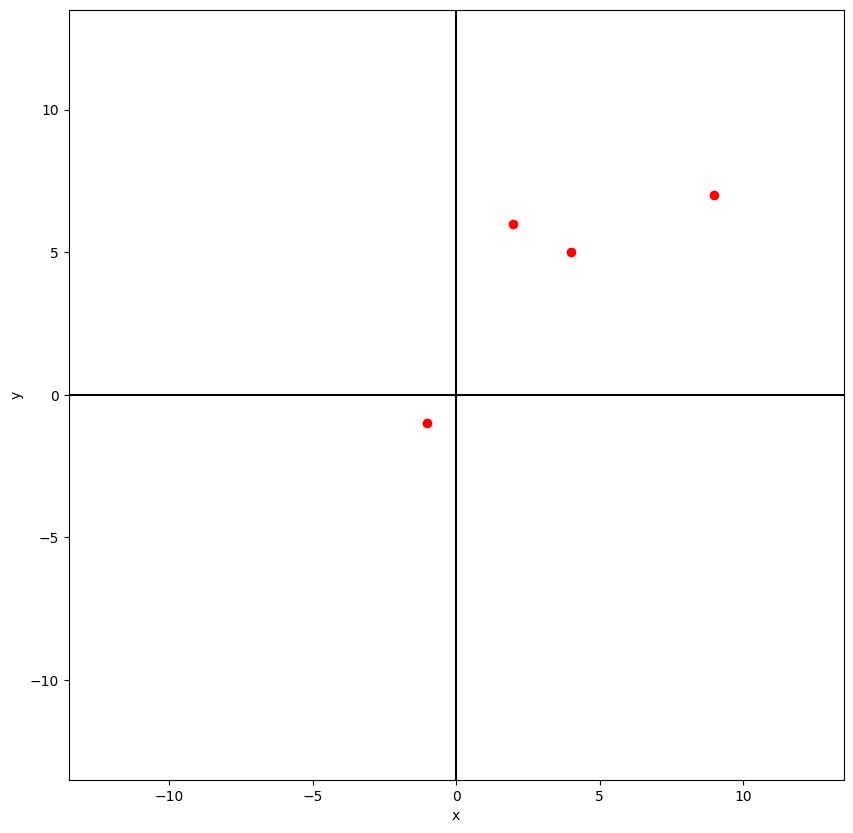

In [109]:
# plot the data with main axes
def plot_scaled_data(X):
    plt.figure(figsize=(10, 10))
    plt.scatter(X[:,0], X[:,1], color='r')
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')
    # symmetric range based on data
    max_val = np.max(np.abs(X)) * 1.5
    plt.xlim(-max_val, max_val)
    plt.ylim(-max_val, max_val)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

plot_scaled_data(X_train)

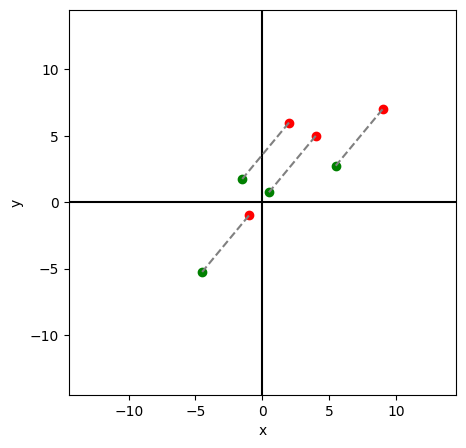

In [110]:
# center the data
X_train_center = X_train - np.mean(X_train, axis=0)
X_train_center

plt.figure(figsize=(5, 5))
plt.scatter(X_train[:,0], X_train[:,1], color='r')
plt.scatter(X_train_center[:,0], X_train_center[:,1], color='g')
plt.axhline(0, color='black')
plt.axvline(0, color='black')
# symmetric range based on data
max_val = np.max(np.abs(X_train_center) + np.abs(X_train))
plt.xlim(-max_val, max_val)
plt.ylim(-max_val, max_val)
plt.xlabel('x')
plt.ylabel('y')
# show shift from original data to centered data
for i in range(len(X_train)):
    plt.plot([X_train[i,0], X_train_center[i,0]], [X_train[i,1], X_train_center[i,1]], '--', color='gray')
plt.show()

In [111]:
X_train_center

array([[-4.5 , -5.25],
       [-1.5 ,  1.75],
       [ 0.5 ,  0.75],
       [ 5.5 ,  2.75]])

In [113]:
# calculate covariance matrix
cov_mat = np.cov(X_train_center)
cov_mat

array([[ 0.28125, -1.21875, -0.09375,  1.03125],
       [-1.21875,  5.28125,  0.40625, -4.46875],
       [-0.09375,  0.40625,  0.03125, -0.34375],
       [ 1.03125, -4.46875, -0.34375,  3.78125]])

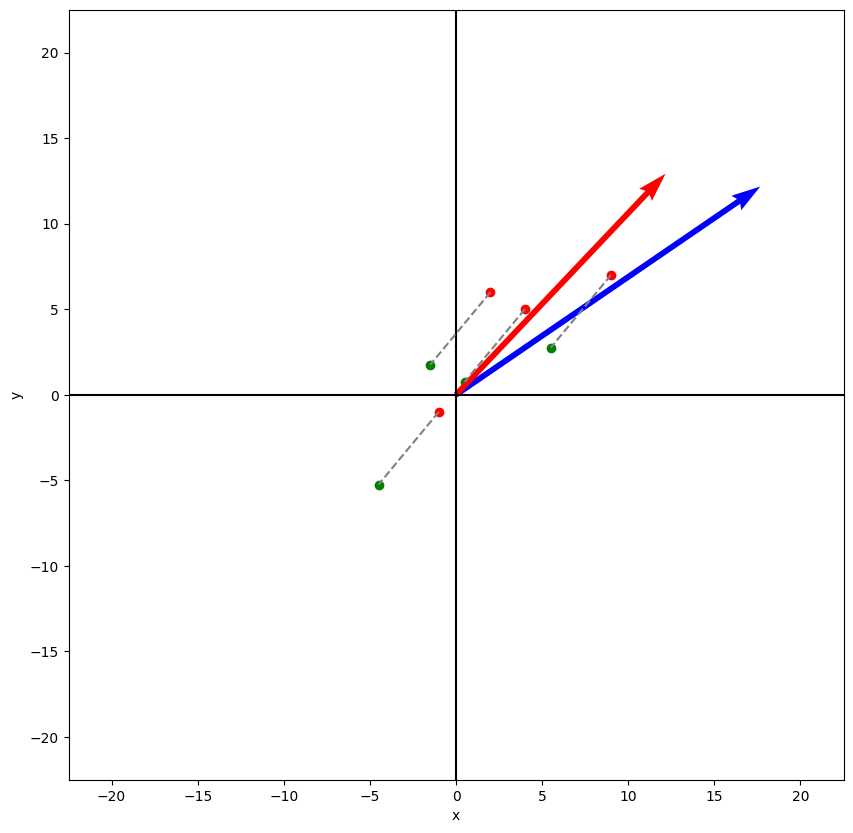

In [114]:
# calculate covariance matrix for centered matrix
cov_mat_center = np.cov(X_train_center.T)
cov_mat_center
# plot these two vectors
plt.figure(figsize=(10, 10))
plt.scatter(X_train[:,0], X_train[:,1], color='r')
plt.scatter(X_train_center[:,0], X_train_center[:,1], color='g')
plt.axhline(0, color='black')
plt.axvline(0, color='black')
# symmetric range based on data
max_val = np.max(np.abs(X_train_center) + np.abs(X_train)) + 8
plt.xlim(-max_val, max_val)
plt.ylim(-max_val, max_val)
plt.xlabel('x')
plt.ylabel('y')
# show shift from original data to centered data
for i in range(len(X_train)):
    plt.plot([X_train[i,0], X_train_center[i,0]], [X_train[i,1], X_train_center[i,1]], '--', color='gray')
# plot the cov_mat_center vectors
plt.quiver([0,0], [0,0], cov_mat_center[:,0], cov_mat_center[:,1], angles='xy', scale_units='xy', scale=1, color=['b','r'], label=['x','y'])
plt.show()

In [115]:
# calculate the eigenvalues and eigenvectors
eig_vals, eig_vecs = np.linalg.eig(cov_mat_center)

In [116]:
eig_vecs

array([[ 0.77187736, -0.63577145],
       [ 0.63577145,  0.77187736]])

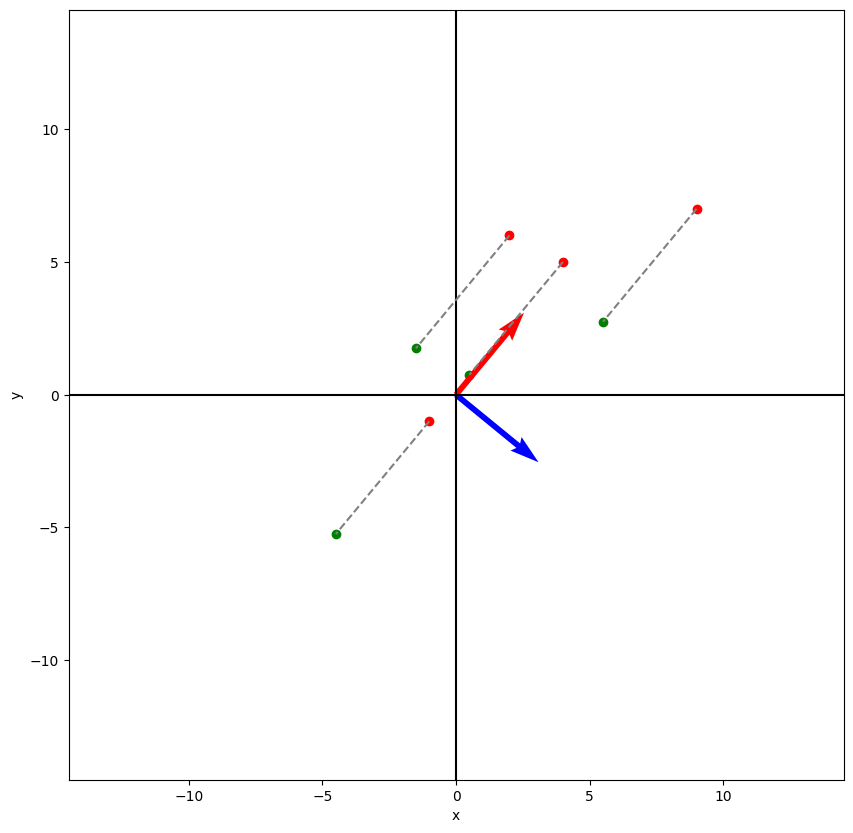

In [99]:
eig_vals
# add to the plot
# plot these two vectors
plt.figure(figsize=(10, 10))
plt.scatter(X_train[:,0], X_train[:,1], color='r')
plt.scatter(X_train_center[:,0], X_train_center[:,1], color='g')
plt.axhline(0, color='black')
plt.axvline(0, color='black')
# symmetric range based on data
max_val = np.max(np.abs(X_train_center) + np.abs(X_train))
plt.xlim(-max_val, max_val)
plt.ylim(-max_val, max_val)
plt.xlabel('x')
plt.ylabel('y')
# show shift from original data to centered data
for i in range(len(X_train)):
    plt.plot([X_train[i,0], X_train_center[i,0]], [X_train[i,1], X_train_center[i,1]], '--', color='gray')
# plot the cov_mat vectors with arrows
plt.quiver([0,0], [0,0], eig_vecs[:,0], eig_vecs[:,1], angles='xy', scale_units='xy', scale=0.25, color=['b','r'])
plt.show()

In [100]:
eig_vecs
# check that the eigenvectors are orthogonal
np.dot(eig_vecs[:,0], eig_vecs[:,1])

0.0

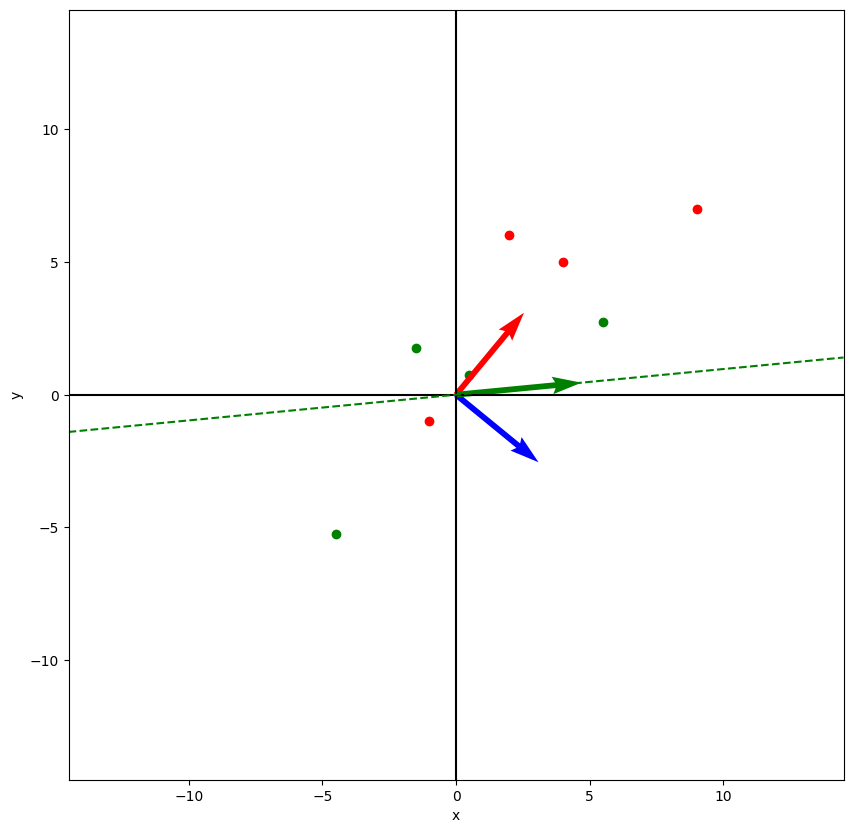

In [101]:
# calculate the sum vector of eig_vecs
sum_vec = eig_vecs[0] + eig_vecs[1]

# add to the plot
# plot these two vectors
plt.figure(figsize=(10, 10))
plt.scatter(X_train[:,0], X_train[:,1], color='r')
plt.scatter(X_train_center[:,0], X_train_center[:,1], color='g')
plt.axhline(0, color='black')
plt.axvline(0, color='black')
# symmetric range based on data
max_val = np.max(np.abs(X_train_center) + np.abs(X_train))
plt.xlim(-max_val, max_val)
plt.ylim(-max_val, max_val)
plt.xlabel('x')
plt.ylabel('y')
# plot the cov_mat vectors with arrows
plt.quiver([0,0], [0,0], eig_vecs[:,0], eig_vecs[:,1], angles='xy', scale_units='xy', scale=0.25, color=['b','r'])
# plot the sum vector
plt.quiver([0], [0], sum_vec[0], sum_vec[1], angles='xy', scale_units='xy', scale=0.3, color=['g'])
# plot the sum vector as a infinite dotted line across the plot
plt.axline((0, 0), slope=sum_vec[1]/sum_vec[0], linestyle='--', color='g')
plt.show()

-3.5244878611285633
-0.936643931668699
0.4029519221273399
4.058179870669923
[-3.52448786 -0.93664393  0.40295192  4.05817987]


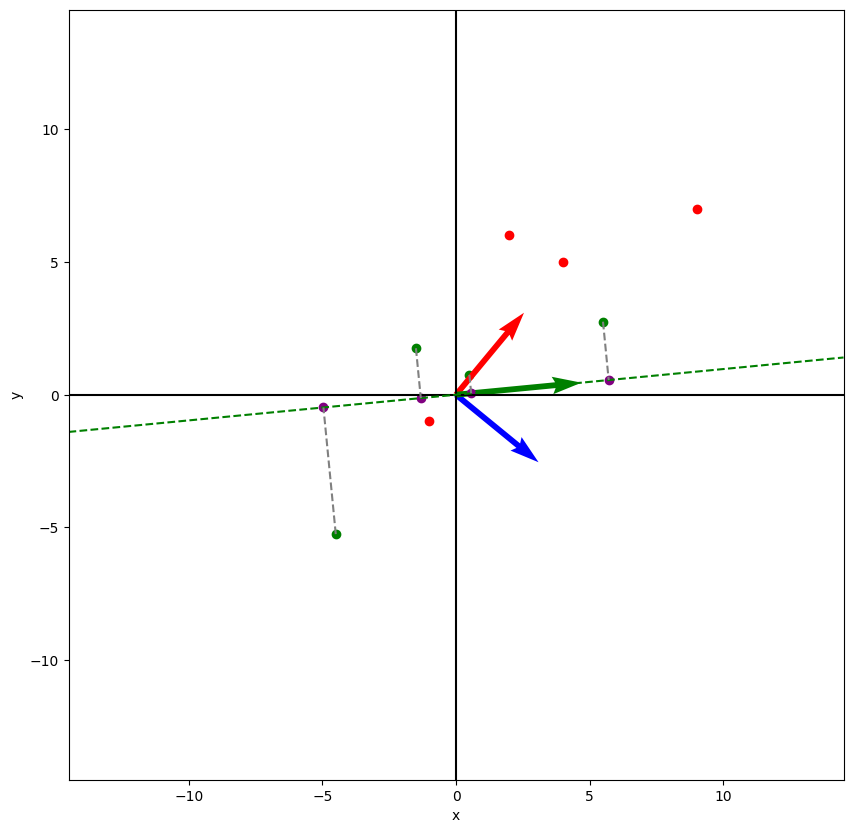

In [143]:
# project the data onto the eigenvectors and plot them
# plot these two vectors
plt.figure(figsize=(10, 10))
plt.scatter(X_train[:,0], X_train[:,1], color='r')
plt.scatter(X_train_center[:,0], X_train_center[:,1], color='g')
plt.axhline(0, color='black')
plt.axvline(0, color='black')
# symmetric range based on data
max_val = np.max(np.abs(X_train_center) + np.abs(X_train))
plt.xlim(-max_val, max_val)
plt.ylim(-max_val, max_val)
plt.xlabel('x')
plt.ylabel('y')
# plot the cov_mat vectors with arrows
plt.quiver([0,0], [0,0], eig_vecs[:,0], eig_vecs[:,1], angles='xy', scale_units='xy', scale=0.25, color=['b','r'])
# plot the sum vector
plt.quiver([0], [0], sum_vec[0], sum_vec[1], angles='xy', scale_units='xy', scale=0.3, color=['g'])
# plot the sum vector as a infinite dotted line across the plot
plt.axline((0, 0), slope=sum_vec[1]/sum_vec[0], linestyle='--', color='g')

# plot projections of the data onto the sum_vec
# calculate orthogonal projection of each point onto the sum_vec
for i in range(len(X_train)):
    # calculate the projection onto the sum_vec
    print(np.dot(X_train_center[i], sum_vec) / np.dot(sum_vec, sum_vec))
    proj = np.dot(X_train_center[i], sum_vec) / np.dot(sum_vec, sum_vec) * sum_vec
    # plot the projection
    plt.plot([X_train_center[i,0], proj[0]], [X_train_center[i,1], proj[1]], '--', color='gray')

# calculate the projection on sum_vec distance to the origin for all points
proj_dist = np.dot(X_train_center, sum_vec) / np.dot(sum_vec, sum_vec)
# plot the projection on sum_vec distance to the origin for all points
plt.scatter(proj_dist * sum_vec[0], proj_dist * sum_vec[1], color='purple')
print(proj_dist)
plt.show()

In [140]:
# project xi to xpca
# calculate the projection on sum_vec distance to the origin for all points
proj_dist = np.dot(X_train_center, sum_vec) / np.dot(sum_vec, sum_vec)
# calculate the projection onto the sum_vec
proj = proj_dist.reshape(-1, 1) * sum_vec.reshape(1, -1)
proj

array([[-4.96124115, -0.47970365],
       [-1.31846572, -0.12748278],
       [ 0.56721479,  0.05484414],
       [ 5.71249208,  0.55234229]])